<a href="http://agrum.org" target="blank"><img src="http://agrum.gitlab.io/theme/img/logoAgrum.png" align="left" style="height:100px"/></a><a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This pyAgrum's notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

In [1]:
import sys
import os

import numpy as np

import pyAgrum as gum

%matplotlib inline
from pyAgrum.lib.bn2roc import showROC
from pyAgrum.lib.bn2roc import showPR
from pyAgrum.lib.bn2roc import showROC_PR

In [2]:
bn=gum.loadBN("res/alarm.dsl")

In [3]:
gum.generateCSV(bn,"out/learn.csv",10000,show_progress=True,with_labels=True)
print()
gum.generateCSV(bn,"out/train.csv",1000,show_progress=True,with_labels=True)

 out/learn.csv : [ ########################################################### ] 100%
Log2-Likelihood : -151530.31917329074

 out/train.csv : [ ########################################################### ] 100%
Log2-Likelihood : -15214.806575960954


-15214.806575960954

# Learning a BN from learn.csv

In [4]:
# Learning a BN from the database
learner=gum.BNLearner("out/train.csv")

# # Hill-Climbing
learner.useGreedyHillClimbing()
bn2=learner.learnBN()
bn2.setProperty("name","Learned_{0}s".format(learner.currentTime()))

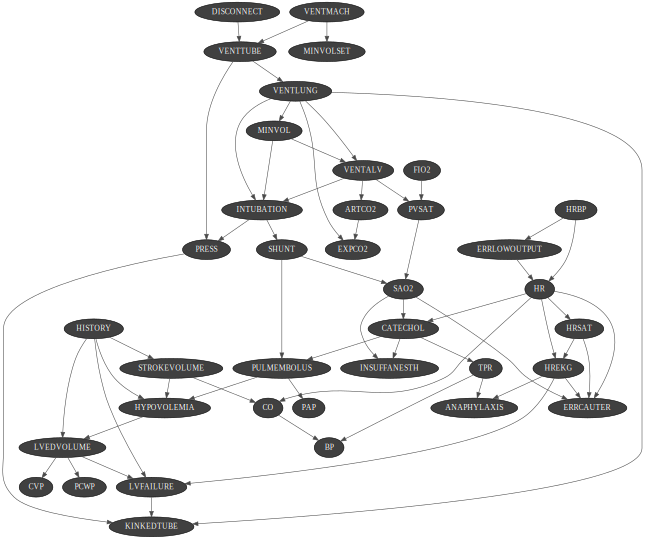

In [5]:
import pyAgrum.lib.notebook as gnb
gnb.showBN(bn2,size="9")

In [6]:
print(bn2.names())

{'SAO2', 'VENTALV', 'CATECHOL', 'HISTORY', 'MINVOLSET', 'HR', 'HREKG', 'EXPCO2', 'STROKEVOLUME', 'ARTCO2', 'HRBP', 'PULMEMBOLUS', 'TPR', 'VENTTUBE', 'INSUFFANESTH', 'ANAPHYLAXIS', 'ERRCAUTER', 'BP', 'CVP', 'FIO2', 'VENTMACH', 'PCWP', 'PRESS', 'LVFAILURE', 'DISCONNECT', 'KINKEDTUBE', 'PAP', 'MINVOL', 'INTUBATION', 'HYPOVOLEMIA', 'ERRLOWOUTPUT', 'CO', 'PVSAT', 'VENTLUNG', 'LVEDVOLUME', 'HRSAT', 'SHUNT'}


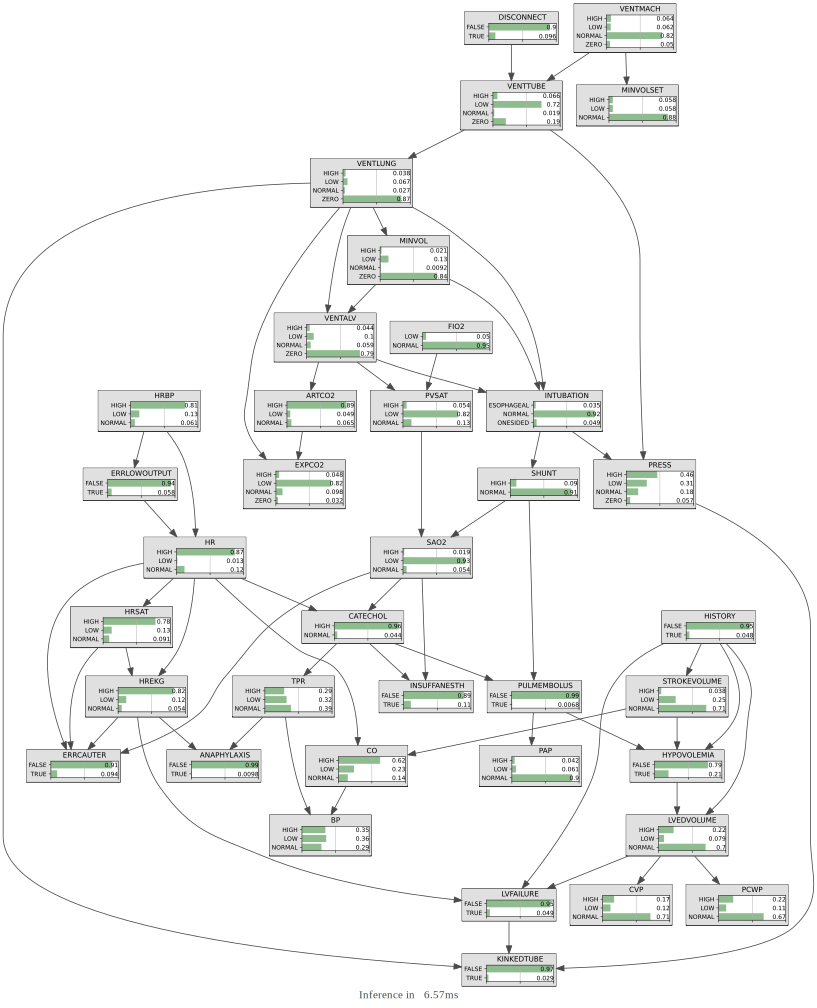

In [7]:
gnb.showInference(bn2,evs={},size="14")

# Two classifiers from the learned BN

In [8]:
print(bn2.variableFromName("HRSAT"))
print(bn2.variableFromName("INTUBATION"))

HRSAT<HIGH,LOW,NORMAL>
INTUBATION<ESOPHAGEAL,NORMAL,ONESIDED>


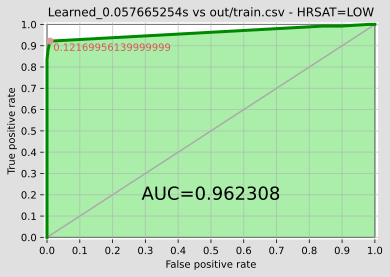

In [9]:
showROC(bn2,"out/train.csv",'HRSAT','LOW',show_progress=False);

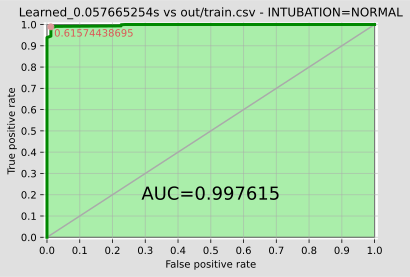

In [10]:
showROC(bn2,"out/train.csv",'INTUBATION',"NORMAL",show_progress=False);

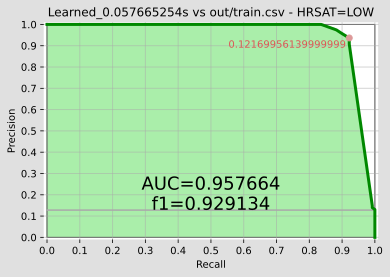

In [11]:
showPR(bn2,"out/train.csv",'HRSAT','LOW',show_progress=False);

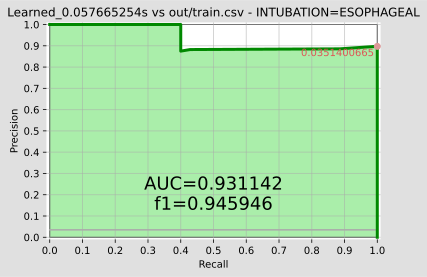

In [12]:
showPR(bn2,"out/train.csv",'INTUBATION',"ESOPHAGEAL",show_progress=False);

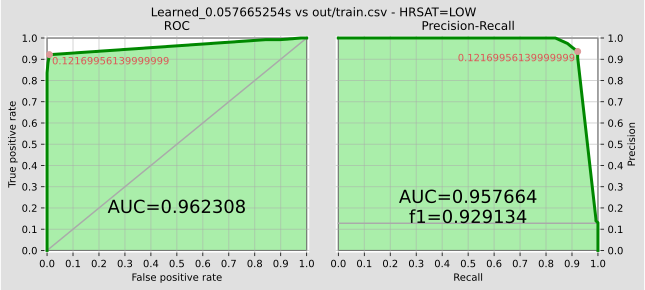

In [13]:
showROC_PR(bn2,"out/train.csv",'HRSAT','LOW',show_progress=False);

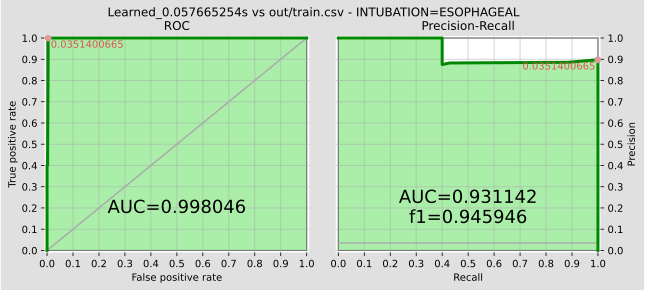

In [14]:
showROC_PR(bn2,"out/train.csv",'INTUBATION',"ESOPHAGEAL",show_progress=False);